In [222]:
# 한글폰트
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonte-nanum* -qq

import matplotlib.font_manager as fm
fm._rebuild()

# 한글 폰트 확인하기
for fontInfo in fm.fontManager.ttflist:
  if 'Nanum' in fontInfo.name:
    print(fontInfo.name + ' = '+fontInfo.fname)

plt.rc('font', family = 'NanumGothic')

# 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

E: Unable to locate package fonte-nanum*
E: Couldn't find any package by glob 'fonte-nanum*'
E: Couldn't find any package by regex 'fonte-nanum*'
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf


In [223]:
# 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')


# 데이터 불러오기
train = pd.read_excel('/content/drive/MyDrive/빅콘테스트/2021 빅콘테스트_데이터분석분야_챔피언리그_수산Biz_문제데이터.xlsx')
val = pd.read_excel('/content/drive/MyDrive/빅콘테스트/2021 빅콘테스트_데이터분석분야_챔피언리그_수산Biz_자율평가데이터.xlsx')
test = pd.read_excel('/content/drive/MyDrive/빅콘테스트/2021 빅콘테스트_데이터분석분야_챔피언리그_수산Biz_평가데이터_update_210831.xlsx')

In [224]:
# train과 val 합쳐주기
df = pd.concat([train, val], axis = 0)

# column 편하게 바꿔주기
df = df.rename(columns = {'REG_DATE':'기준일', 'P_TYPE':'제품구분','CTRY_1':'제조국','CTRY_2':'수출국',
                        'P_PURPOSE':'수입용도','CATEGORY_1':'중분류명 카테고리',
                        'CATEGORY_2':'어종','P_NAME':'상세어종','P_IMPORT_TYPE':'수입형태',
                        'P_PRICE':'target'})

train = train.rename(columns= {'REG_DATE':'기준일', 'P_TYPE':'제품구분','CTRY_1':'제조국','CTRY_2':'수출국',
                        'P_PURPOSE':'수입용도','CATEGORY_1':'중분류명 카테고리',
                        'CATEGORY_2':'어종','P_NAME':'상세어종','P_IMPORT_TYPE':'수입형태',
                        'P_PRICE':'target'})

val = val.rename(columns= {'REG_DATE':'기준일', 'P_TYPE':'제품구분','CTRY_1':'제조국','CTRY_2':'수출국',
                        'P_PURPOSE':'수입용도','CATEGORY_1':'중분류명 카테고리',
                        'CATEGORY_2':'어종','P_NAME':'상세어종','P_IMPORT_TYPE':'수입형태',
                        'P_PRICE':'target'})

In [225]:
# 데이터에서 연어만 뽑아 내기
df = df[df['상세어종'] == '연어']
train = train[train['상세어종'] == '연어']
val = val[val['상세어종'] == '연어']

## 데이터 EDA

In [226]:
val

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target
22,2020-01-06,수산물,영국,영국,판매용,어류,연어,연어,냉장,13.710029
37,2020-01-06,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",28.500000
94,2020-01-06,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,냉장,12.199457
195,2020-01-06,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F)",16.335035
196,2020-01-06,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",14.756580
...,...,...,...,...,...,...,...,...,...,...
9435,2020-12-28,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,냉장,8.750000
9448,2020-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",29.740000
9459,2020-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F)",15.290000
9471,2020-12-28,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",14.260000


In [227]:
# 시간별 데이터로 column 만들어 주기
def time_column(data = None, column = None):
  data['year'] = data[column].dt.year
  data['month'] = data[column].dt.month
  data['week'] = data[column].dt.week
  data['day'] = data[column].dt.day

  return data

df = time_column(df, column = '기준일')
train = time_column(train, column = '기준일')
val = time_column(val, column = '기준일')

In [228]:
#  이상치 제거를 IQR 방법을 통해서 제거해 보도록 하자.
def get_outlier(df=None, column=None, weight=4.0):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

delete_index = get_outlier(df = train, column = 'target', weight = 4.0)
print(train.loc[delete_index, :])

# index를 찾아서 전부 nan값으로 변경해준다.
for i in delete_index:
  train.loc[i,'target'] = np.nan

# 자사제품제조용
for i in train.index:
  if i in delete_index:
    train.loc[i,'target'] = train[(train['month'] == train.loc[i,'month']) & (train['수입용도'] == train.loc[i,'수입용도']) & (train['제조국'] == train.loc[i,'제조국'])]['target'].mean()

print('결측치를 채운 이후 :',train.isnull().sum().sum())

             기준일 제품구분   제조국   수출국     수입용도  ...     target  year month week  day
14240 2017-05-15  수산물  노르웨이  노르웨이  자사제품제조용  ...  62.457202  2017     5   20   15
14444 2017-05-22  수산물  노르웨이  노르웨이  자사제품제조용  ...  49.777500  2017     5   21   22
14639 2017-05-29  수산물  노르웨이  노르웨이  자사제품제조용  ...  40.521693  2017     5   22   29
14834 2017-06-05  수산물  노르웨이  노르웨이  자사제품제조용  ...  51.394008  2017     6   23    5
15054 2017-06-12  수산물  노르웨이  노르웨이  자사제품제조용  ...  43.791678  2017     6   24   12
15244 2017-06-19  수산물  노르웨이  노르웨이  자사제품제조용  ...  48.550884  2017     6   25   19
15449 2017-06-26  수산물  노르웨이  노르웨이  자사제품제조용  ...  43.481666  2017     6   26   26
15663 2017-07-03  수산물  노르웨이  노르웨이  자사제품제조용  ...  50.173407  2017     7   27    3
15859 2017-07-10  수산물  노르웨이  노르웨이  자사제품제조용  ...  52.263797  2017     7   28   10
16051 2017-07-17  수산물  노르웨이  노르웨이  자사제품제조용  ...  47.185995  2017     7   29   17

[10 rows x 14 columns]
결측치를 채운 이후 : 0


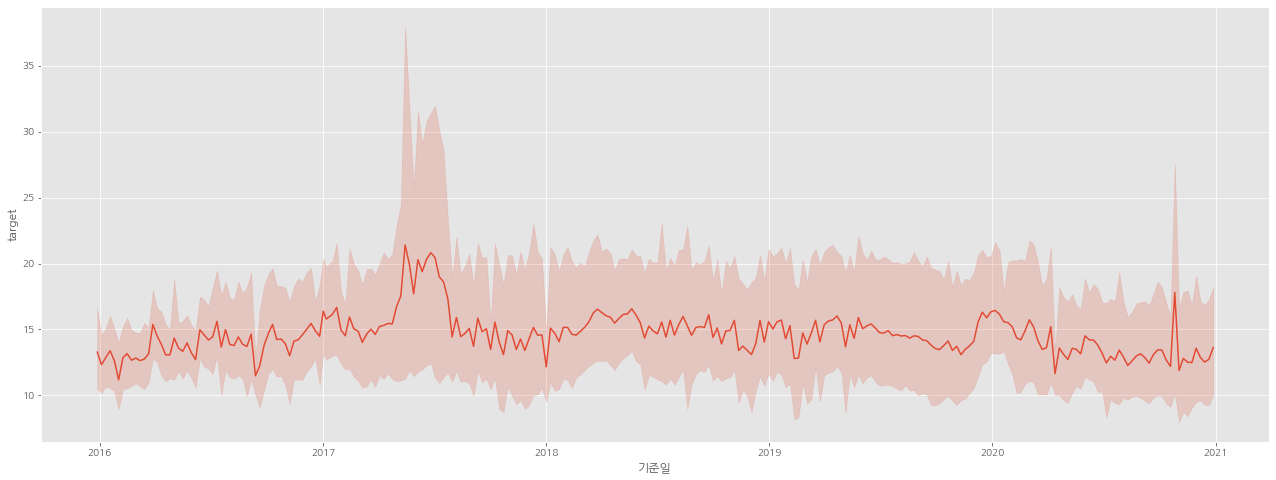

In [229]:
# lineplot으로 그래프 그려보기
plt.figure(figsize = (22,8))
sns.lineplot(data = df, x = '기준일', y = 'target')

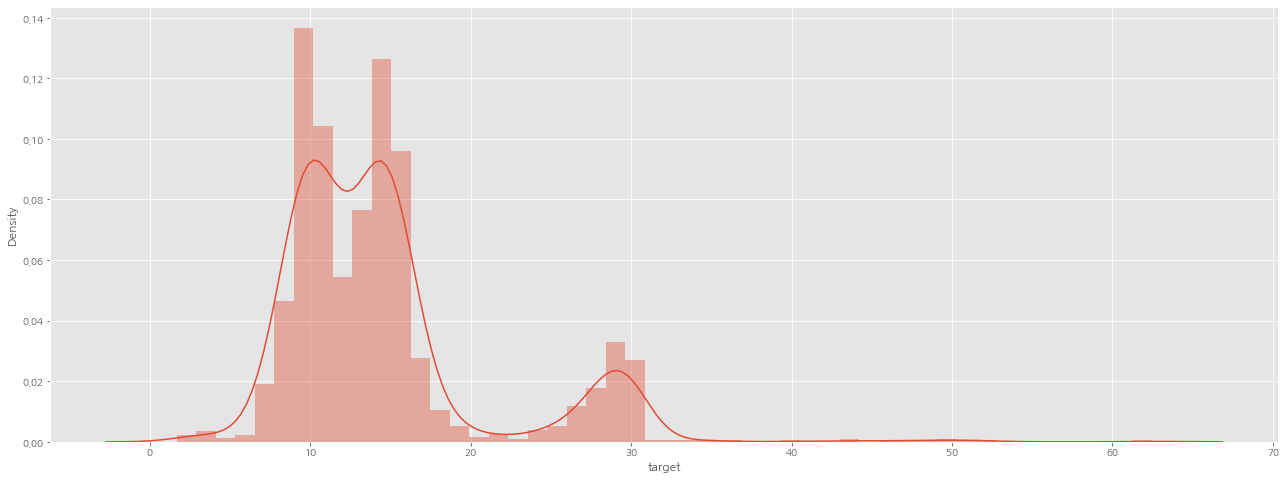

In [230]:
# 밀도 분포를 그려보자.
plt.figure(figsize = (22,8))
sns.distplot(df['target'])

In [231]:
df = df.reset_index(drop = True)
train = train.reset_index(drop = True)
val = val.reset_index(drop = True)

In [232]:
# 냉동이라는 부분은 얼마 없다고 판단한다.
# 그러면 냉동의 데이터를 하나의 변수로 묶어주기로 하자.
for i in df.index:
  if df.loc[i, '수입형태'][:2] == '냉동':
    df.loc[i,'수입형태'] = '냉동'

for i in train.index:
  if train.loc[i, '수입형태'][:2] == '냉동':
    train.loc[i,'수입형태'] = '냉동'

for i in val.index:
  if val.loc[i, '수입형태'][:2] == '냉동':
    val.loc[i,'수입형태'] = '냉동'

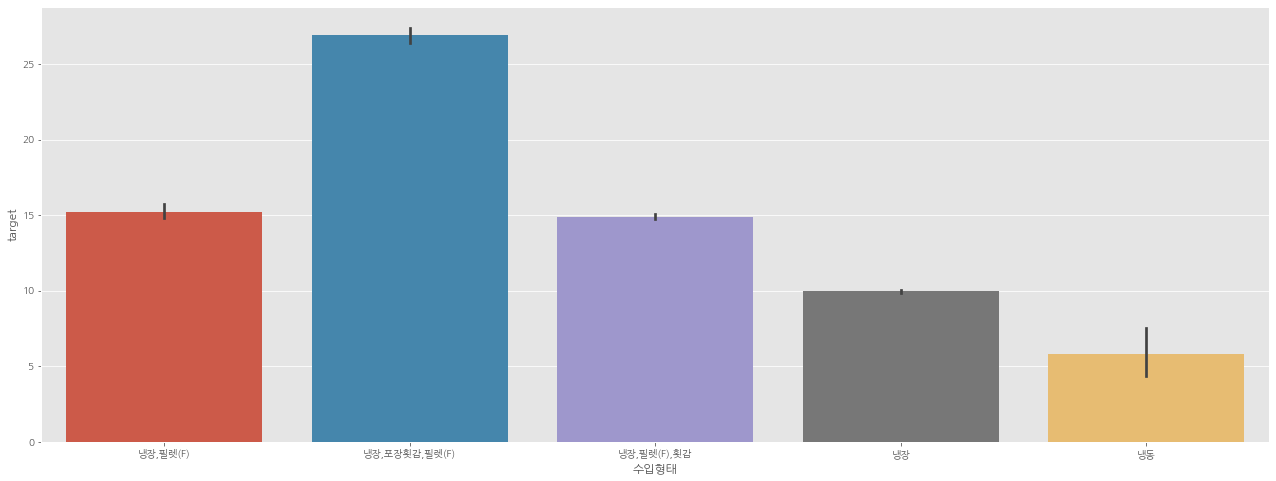

In [233]:
# 수입형태가 잘 바뀌었는지 확인해 본다.
plt.figure(figsize = (22,8))
sns.barplot(data = df, x = '수입형태', y = 'target')

In [234]:
def new_column(df = None):

  연어_수입형태 = set()

  for index in df.index:
    value_list = df.loc[index, '수입형태'].split(',')
    
    연어_수입형태.update(value_list)

  # 고유한 수입형태에 모두 0 넣어주기
  df[list(연어_수입형태)] = 0

  for index in df.index:
    value_list = df.loc[index, '수입형태'].split(',')
    
    for value in value_list:
      df.loc[index, value] = 1

  return df

df = new_column(df = df)
train = new_column(df= train)
val = new_column(df = val)

In [235]:
# 필요없는 변수들을 전부 제거해준다.
df.drop(['제품구분','중분류명 카테고리','어종','상세어종'], axis = 1, inplace = True)
train.drop(['제품구분','중분류명 카테고리','어종','상세어종'], axis = 1, inplace = True)
val.drop(['제품구분','중분류명 카테고리','어종','상세어종'], axis = 1, inplace = True)

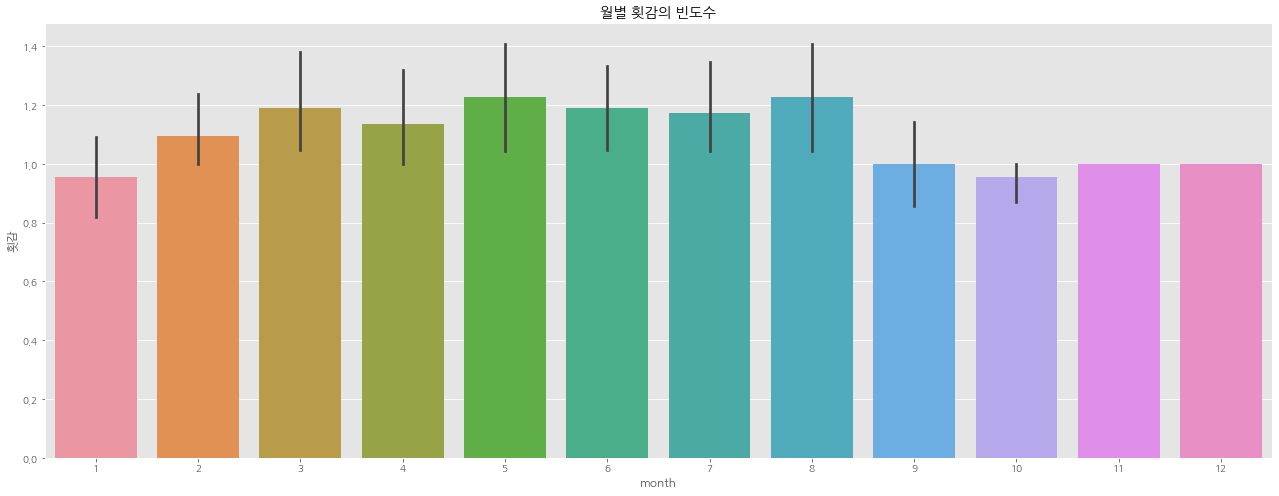

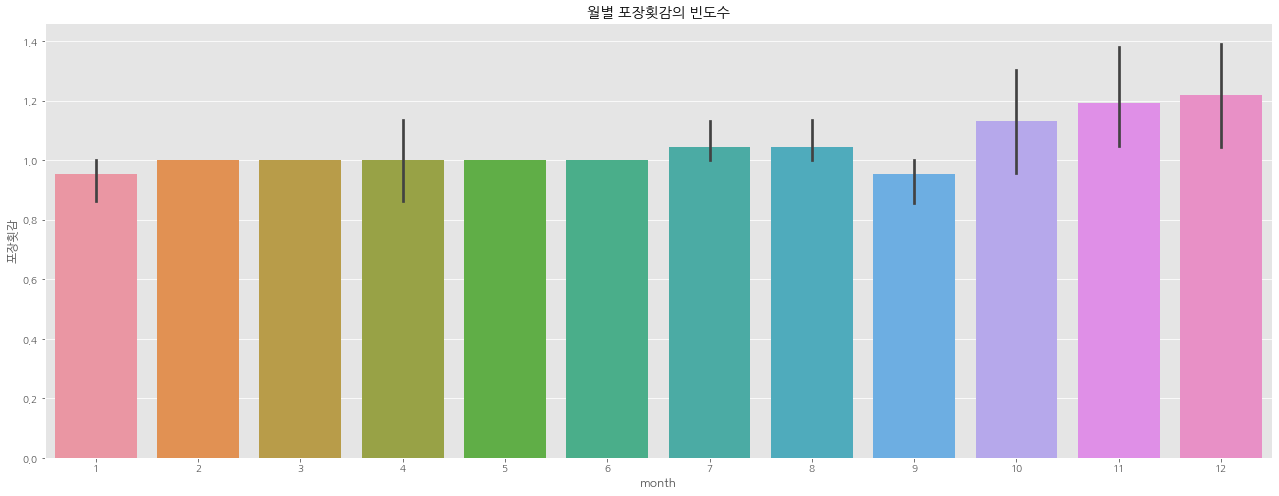

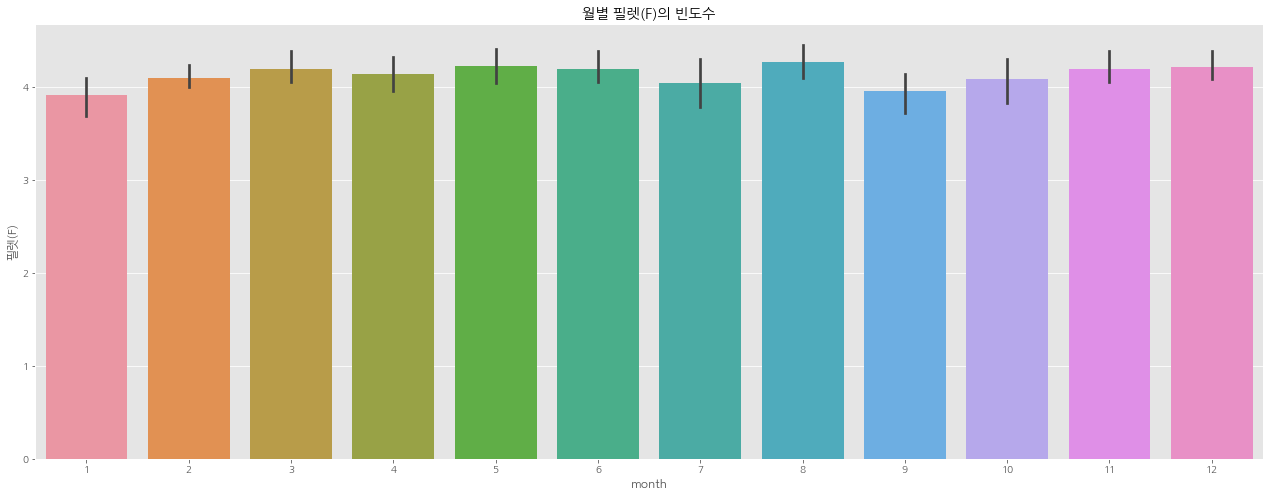

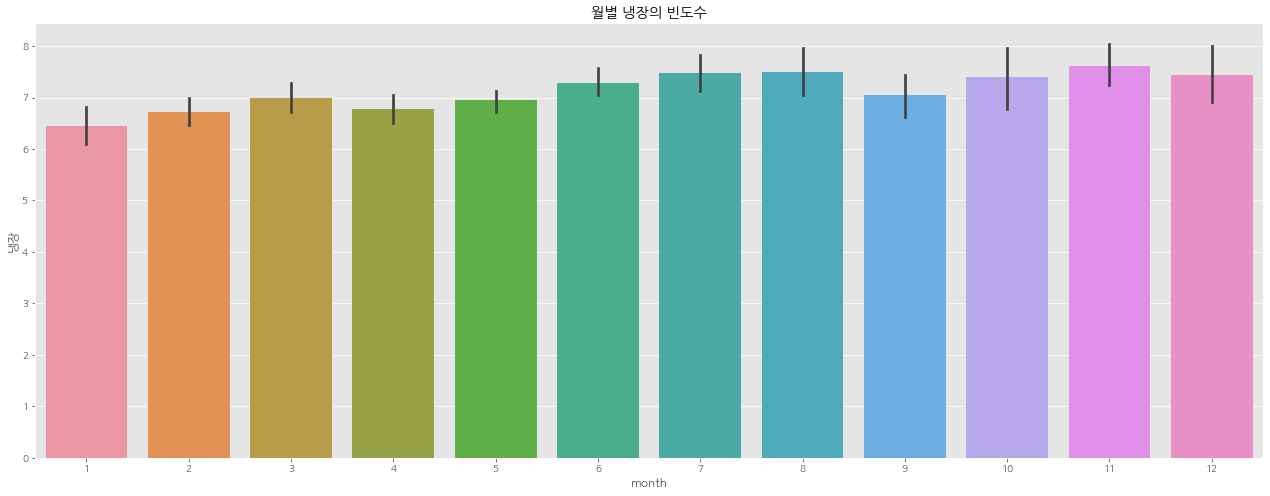

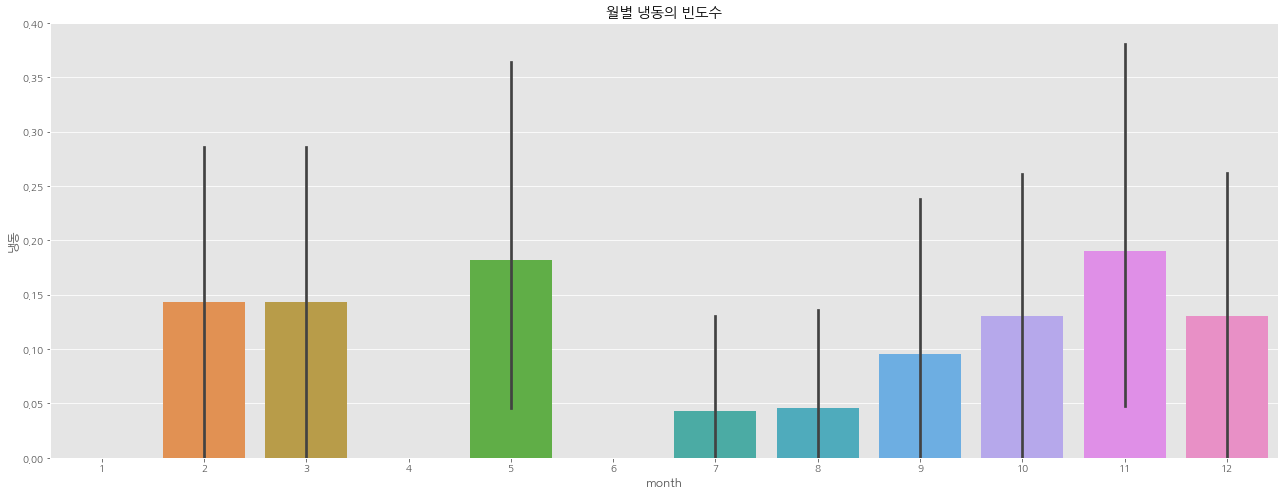

In [236]:
split_수입형태 = df.groupby('기준일')[['횟감'	,'포장횟감'	,'필렛(F)'	,'냉장'	,'냉동']].sum().reset_index()

split_수입형태['year'] = split_수입형태['기준일'].dt.year
split_수입형태['month'] = split_수입형태['기준일'].dt.month
split_수입형태['day'] = split_수입형태['기준일'].dt.day
split_수입형태['week'] = split_수입형태['기준일'].dt.week

target_mean = df.groupby('기준일')['target'].mean().reset_index()

for i in ['횟감'	,'포장횟감'		,'필렛(F)'	,'냉장'	,'냉동']:
  plt.figure(figsize = (22,8))
  sns.barplot(data = split_수입형태, x = 'month', y = i)
  plt.title(f'월별 {i}의 빈도수')
  plt.show()

Text(0.5, 1.0, 'month of target mean')

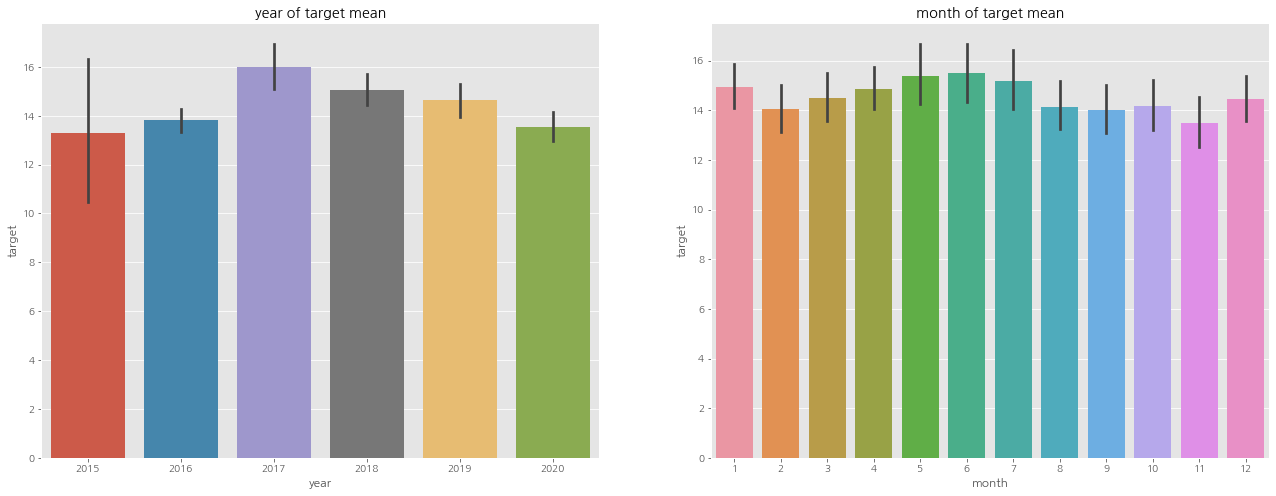

In [237]:
# year, month
fig, ax = plt.subplots(ncols = 2, figsize=  (22,8))
sns.barplot(data = df, x = 'year', y = 'target', ax = ax[0])
sns.barplot(data = df, x = 'month', y = 'target', ax = ax[1])
ax[0].set_title('year of target mean')
ax[1].set_title('month of target mean')

Text(0.5, 1.0, 'week of target mean')

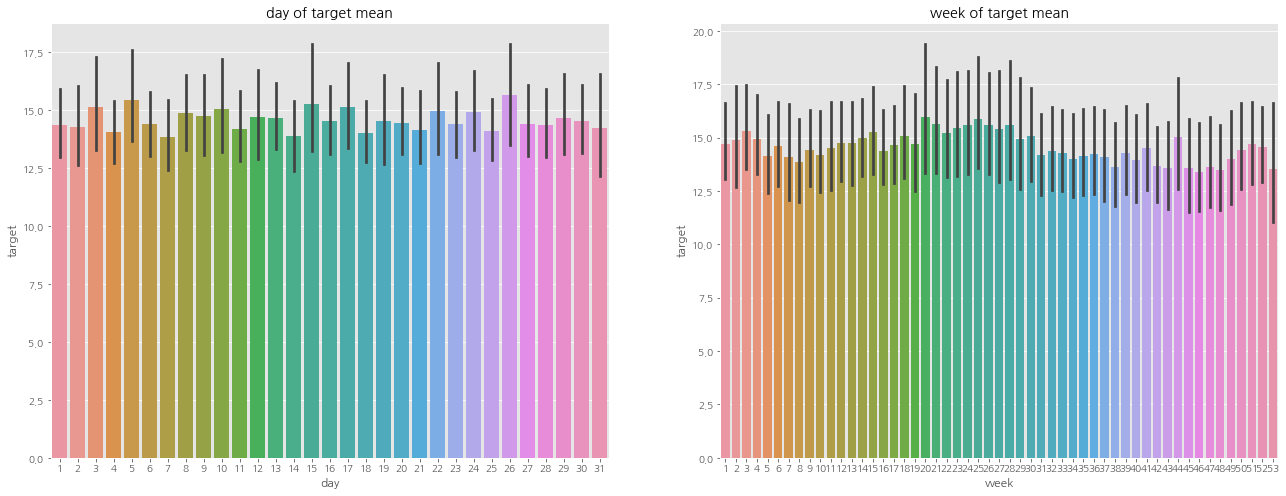

In [238]:
# day, week
fig, ax = plt.subplots(ncols = 2, figsize = (22,8))
sns.barplot(data = df, x = 'day', y = 'target', ax = ax[0])
sns.barplot(data = df, x = 'week', y = 'target', ax = ax[1])
ax[0].set_title('day of target mean')
ax[1].set_title('week of target mean')

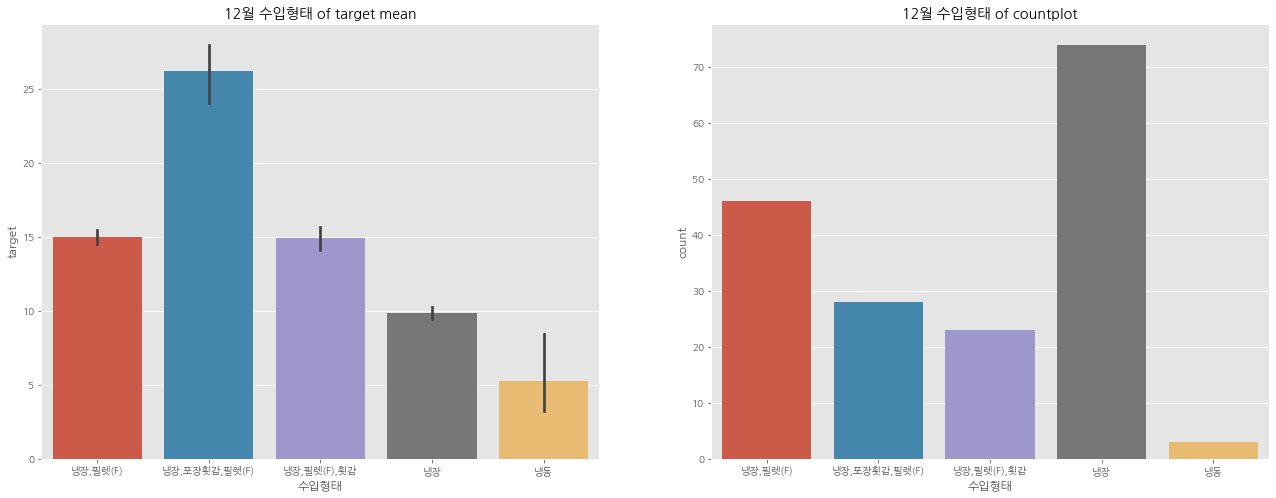

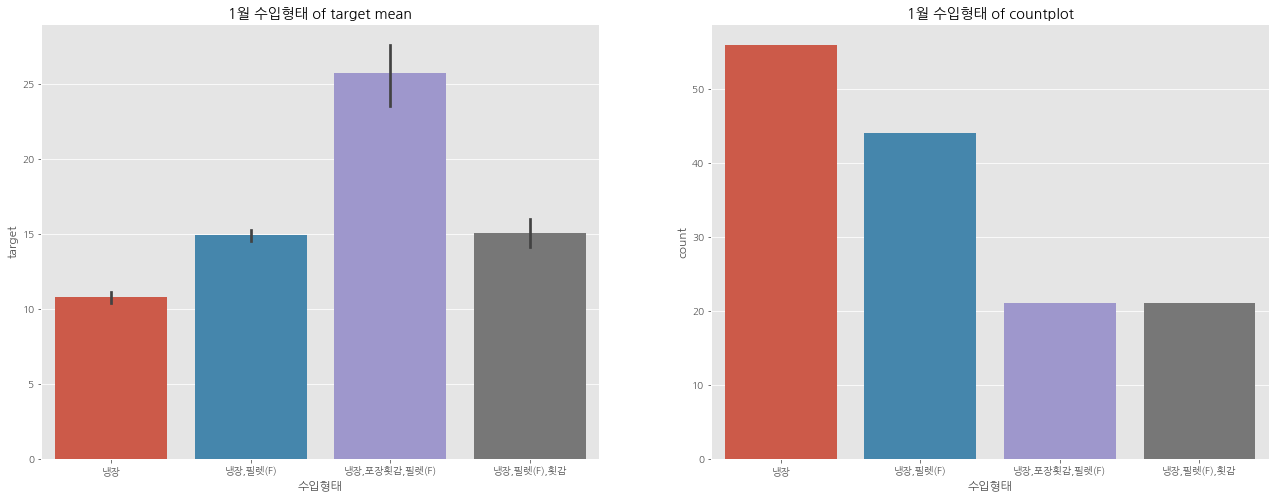

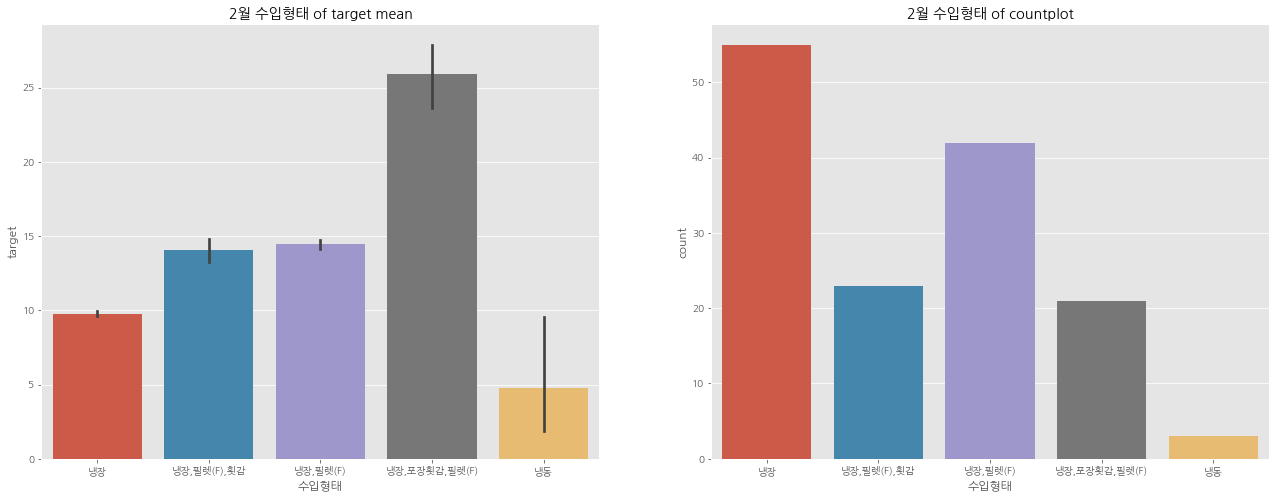

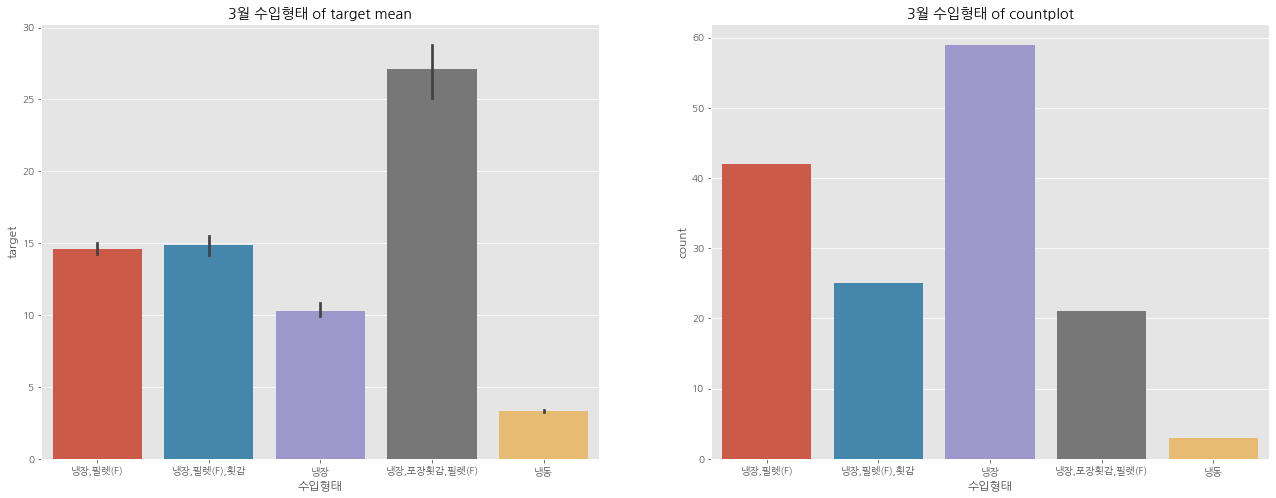

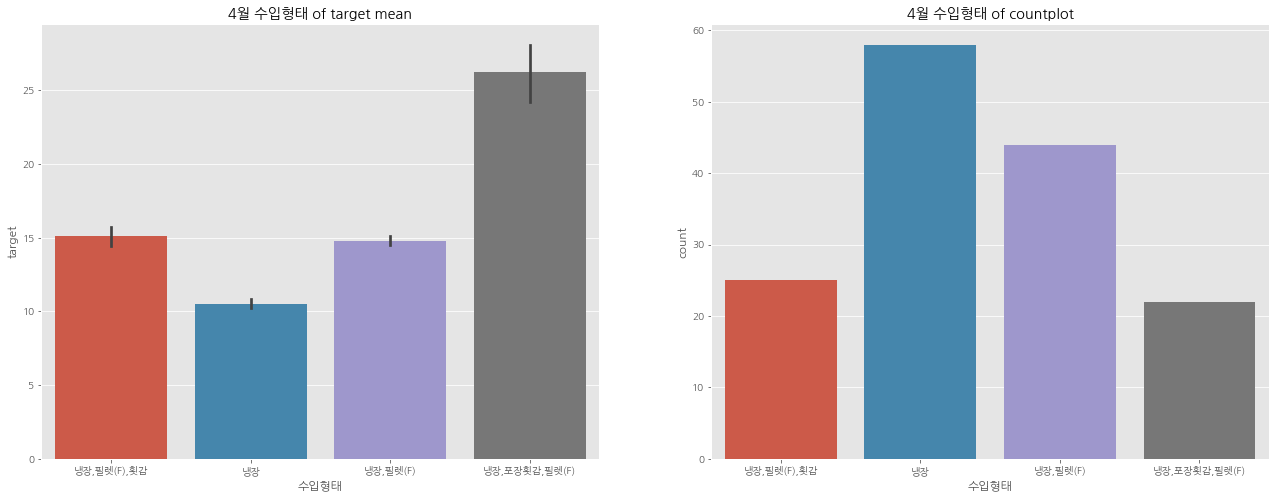

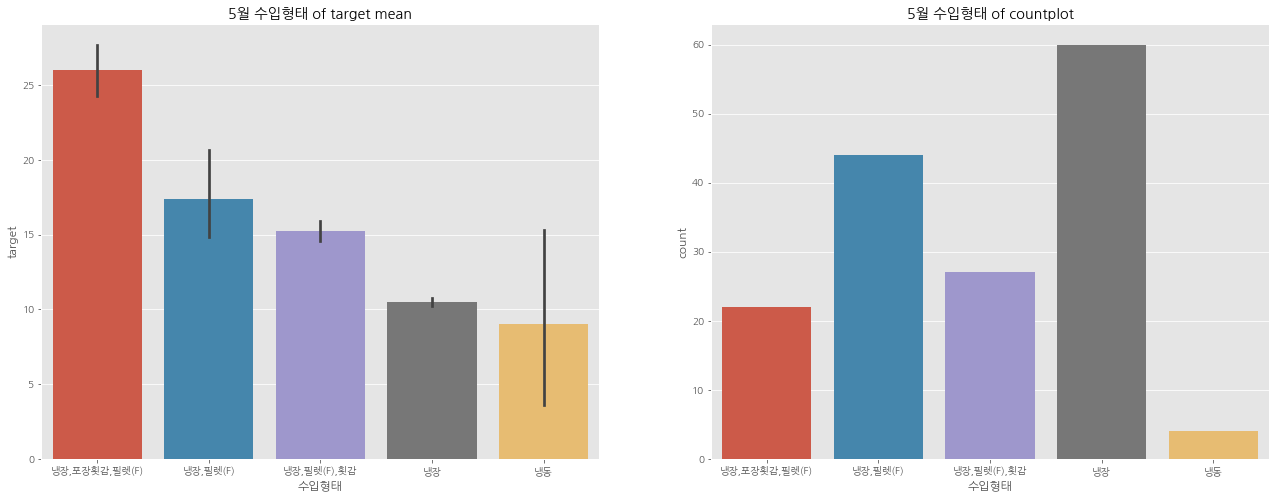

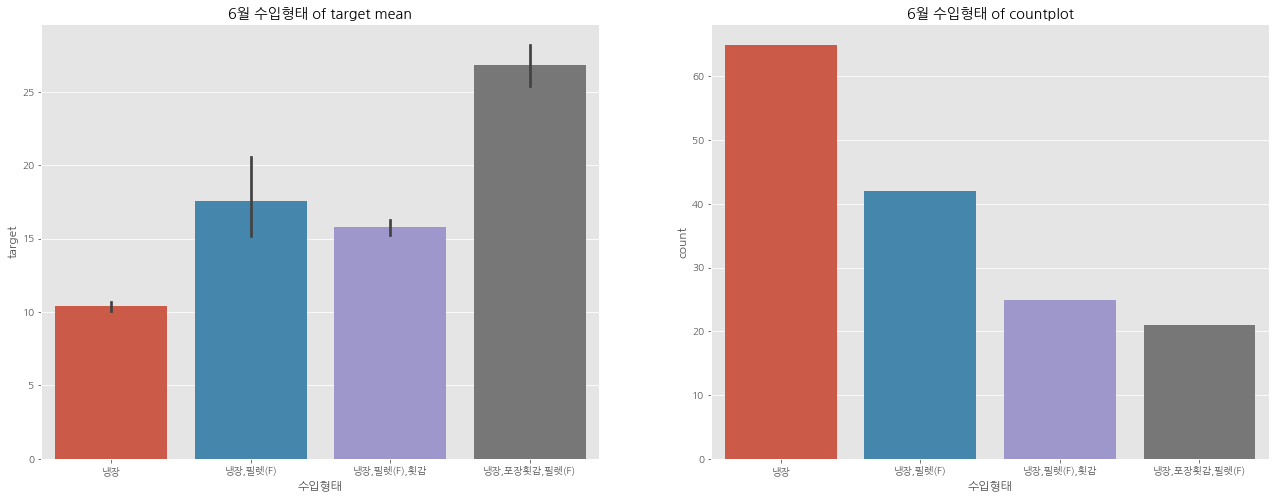

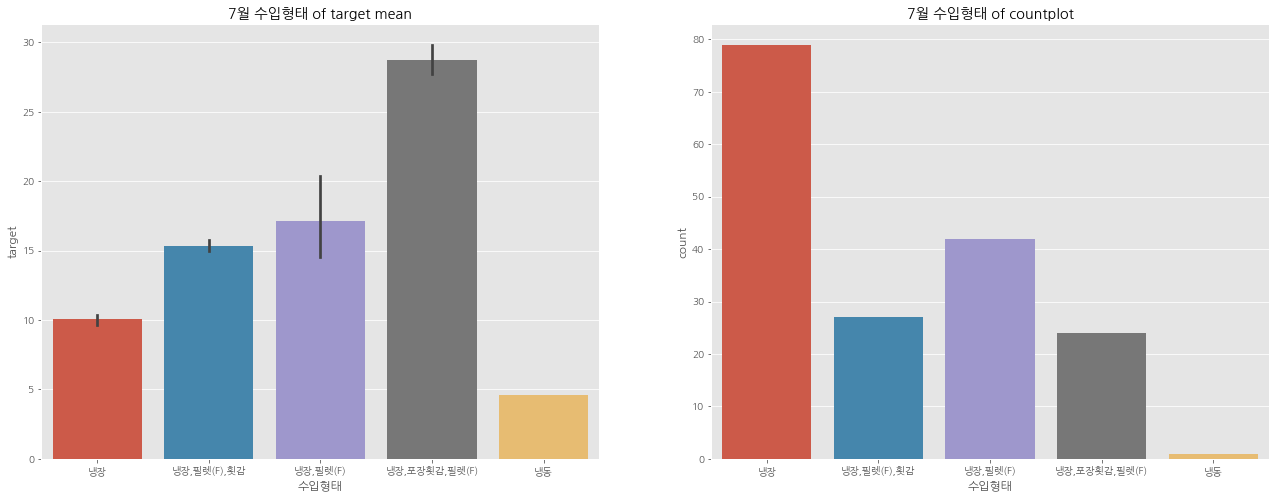

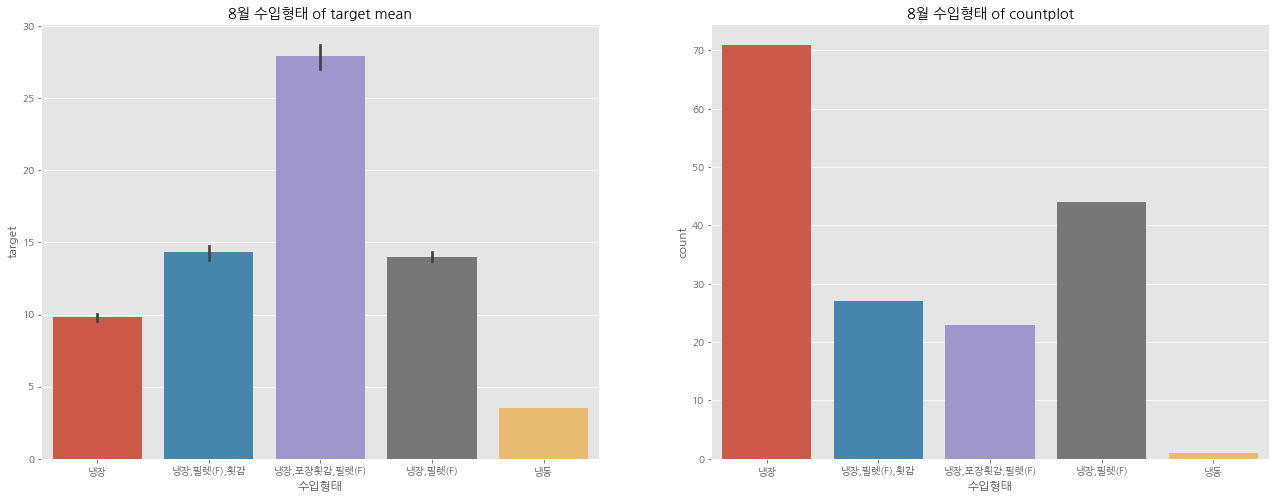

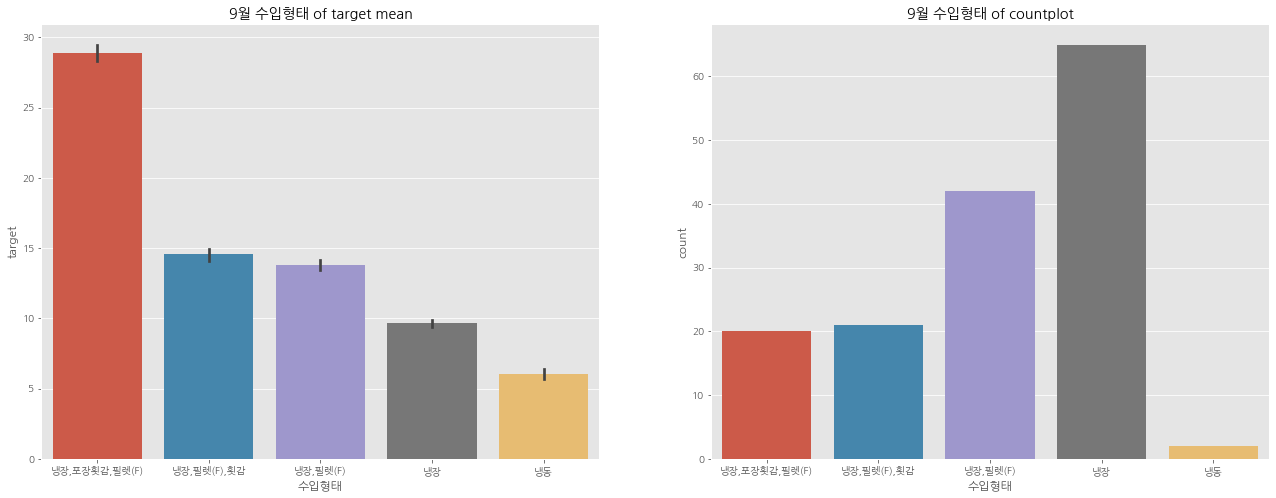

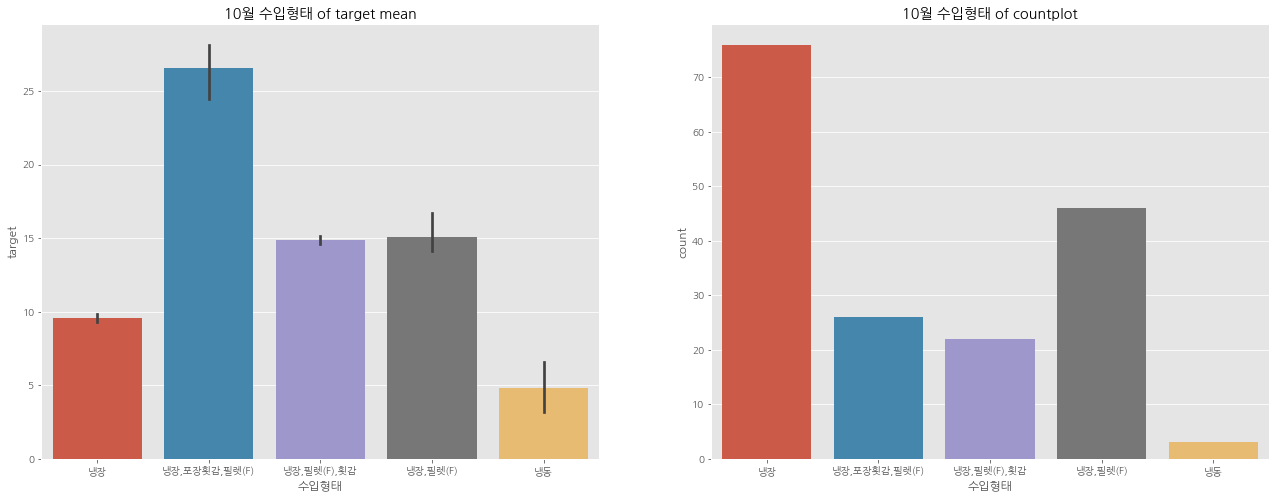

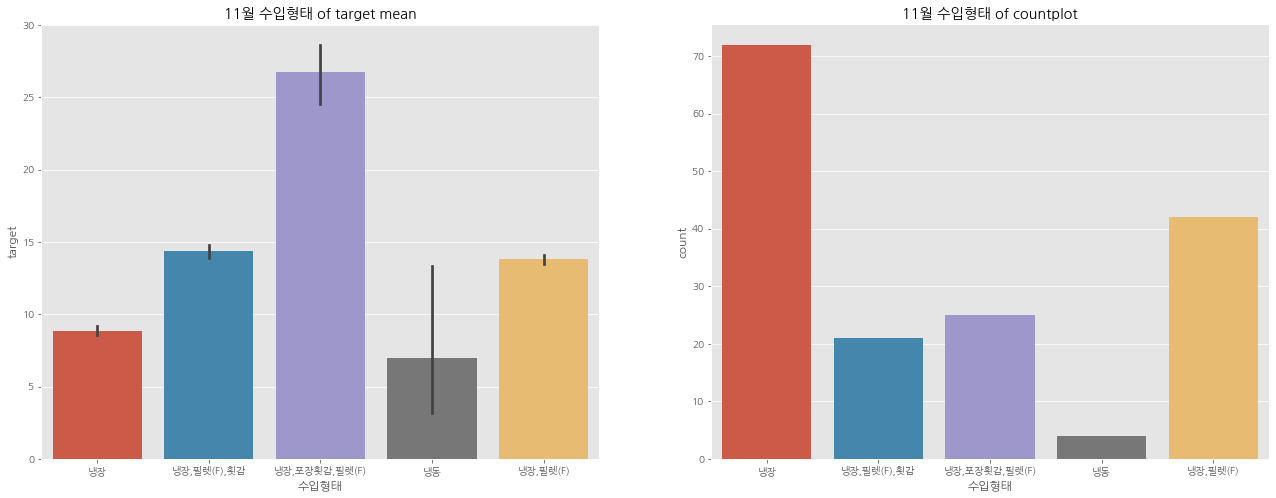

In [239]:
# month별 수입형태 확인해보기
for i in df['month'].unique():
  fig, ax = plt.subplots(ncols = 2,figsize = (22,8))
  sns.barplot(data = df[df['month'] == i], x = '수입형태', y = 'target', ax = ax[0])
  sns.countplot(df[df['month'] == i]['수입형태'], ax = ax[1])
  ax[0].set_title(f'{i}월 수입형태 of target mean')
  ax[1].set_title(f'{i}월 수입형태 of countplot')
  plt.show()

Text(0.5, 0, '')

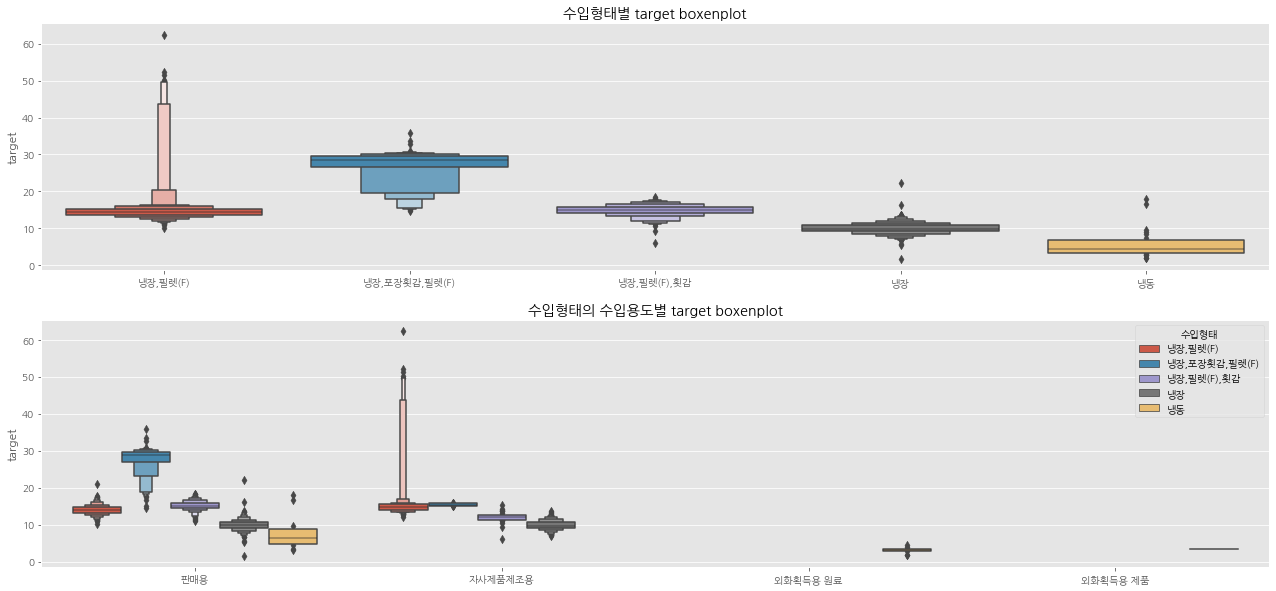

In [240]:
# 각 가격별 데이터를 확인해 보자.
fig, ax = plt.subplots(nrows = 2, figsize = (22,10))
sns.boxenplot(data = df, x = '수입형태', y = 'target', ax = ax[0])
# 수입용도의 평균가격을 수입형태 기준으로 살펴보자.
sns.boxenplot(data = df, x = '수입용도', y = 'target', hue = '수입형태', ax = ax[1])

ax[0].set_title('수입형태별 target boxenplot')
ax[1].set_title('수입형태의 수입용도별 target boxenplot')

ax[0].set_xlabel('')
ax[1].set_xlabel('')

In [241]:
# 위의 그래프를 보면 IQR을 적용시켜 줄 때 수입형태별 수입용도를 기준으로 IQR을 시켜주도록 하자.
for i in train['수입형태'].unique():
  for j in train['수입용도'].unique():
    try:
      delete_index = get_outlier(train[(train['수입형태'] == i) & (train['수입용도'] == j)], column  = 'target', weight = 3.5)

      if len(delete_index) > 0:

        print(f'수입형태 : {i},  수입용도 : {j}, 제거되는 index : {delete_index}')

        train.loc[delete_index, 'target'] = np.nan

        for k in train.index:
          if k in delete_index:

            train.loc[k, 'target'] = train[(train['month'] == train.loc[k,'month']) & (train['수입용도'] == train.loc[k,'수입용도']) & (train['제조국'] == train.loc[k,'제조국'])]['target'].mean()
      
    except:
      pass

# 그러면 칠레의 데이터가 채워지지 않으므로 제거해준다.
train = train.dropna()

수입형태 : 냉장,필렛(F),  수입용도 : 판매용, 제거되는 index : Int64Index([1462], dtype='int64')
수입형태 : 냉장,필렛(F),  수입용도 : 자사제품제조용, 제거되는 index : Int64Index([313, 516, 523, 602, 1471], dtype='int64')
수입형태 : 냉장,포장횟감,필렛(F),  수입용도 : 판매용, 제거되는 index : Int64Index([15, 39, 52, 60, 84, 135, 157, 488], dtype='int64')
수입형태 : 냉장,필렛(F),횟감,  수입용도 : 자사제품제조용, 제거되는 index : Int64Index([31], dtype='int64')
수입형태 : 냉장,  수입용도 : 판매용, 제거되는 index : Int64Index([91, 98, 212], dtype='int64')


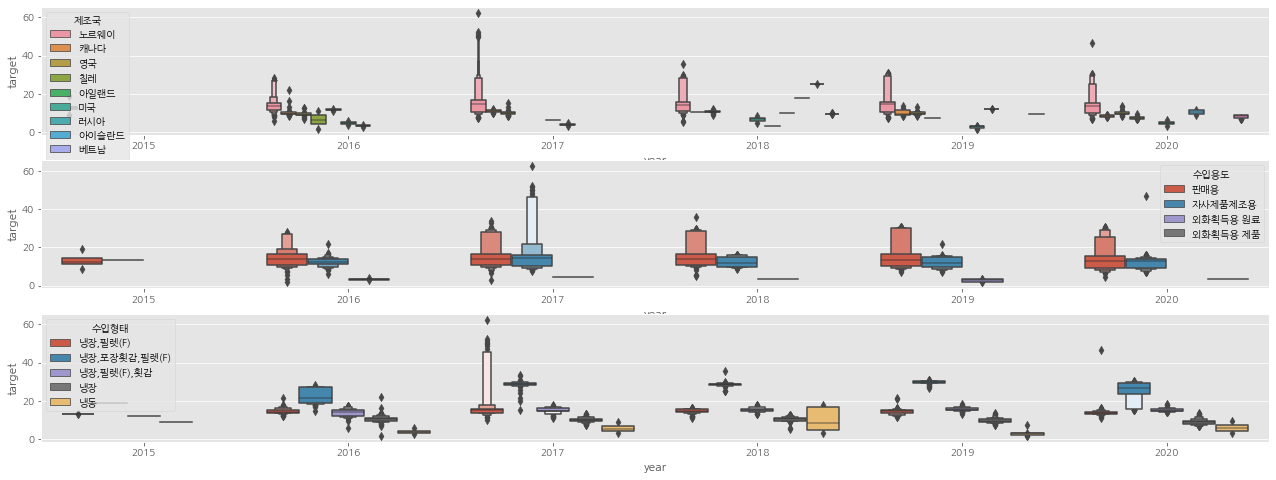

In [242]:
# 연별로 데이터의 이상치를 확인해 보자.
fig, ax = plt.subplots(nrows = 3, figsize = (22,8))
sns.boxenplot(data = df, x = 'year', y = 'target', hue = '제조국', ax = ax[0])
sns.boxenplot(data = df, x = 'year', y = 'target', hue = '수입용도', ax = ax[1])
sns.boxenplot(data = df, x = 'year', y = 'target', hue = '수입형태', ax = ax[2])

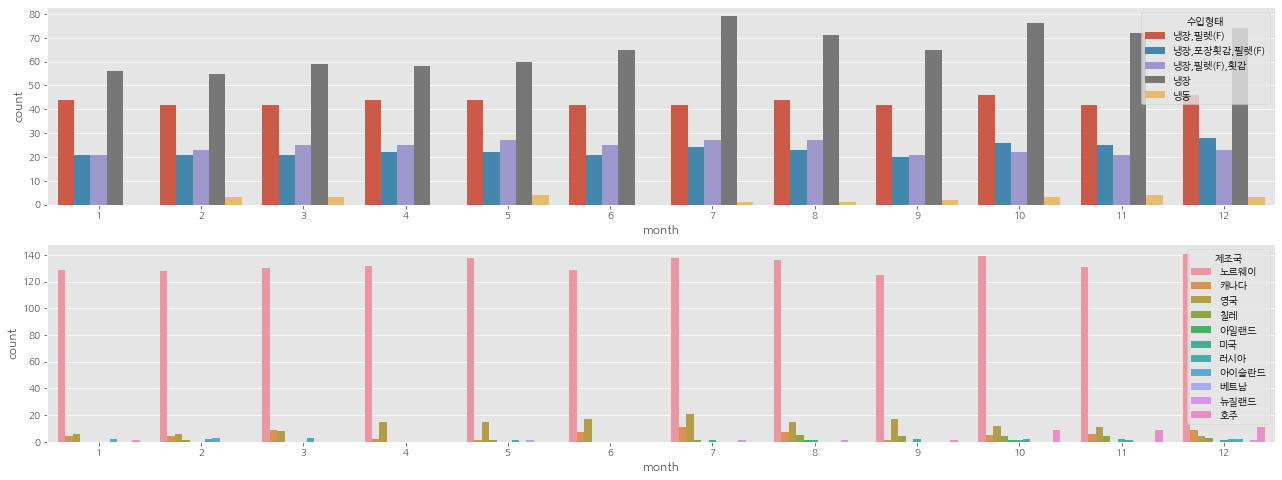

In [243]:
# 그래프를 그려보면서 month별로 수입형태, 제조국에 차이가 있는지 확인한다.
fig, ax = plt.subplots(nrows = 2, figsize = (22,8))
sns.countplot(data = df, x = 'month', hue = '수입형태', ax = ax[0])
sns.countplot(data = df, x = 'month', hue = '제조국', ax = ax[1])

In [244]:
# 제조국을 노르웨이 or 그 이외의 국가
df['제조국'] = df['제조국'].apply(lambda x:x if x == '노르웨이' else '그 이외의 국가')

train['제조국'] = train['제조국'].apply(lambda x:x if x == '노르웨이' else '그 이외의 국가')
val['제조국'] = val['제조국'].apply(lambda x:x if x == '노르웨이' else '그 이외의 국가')

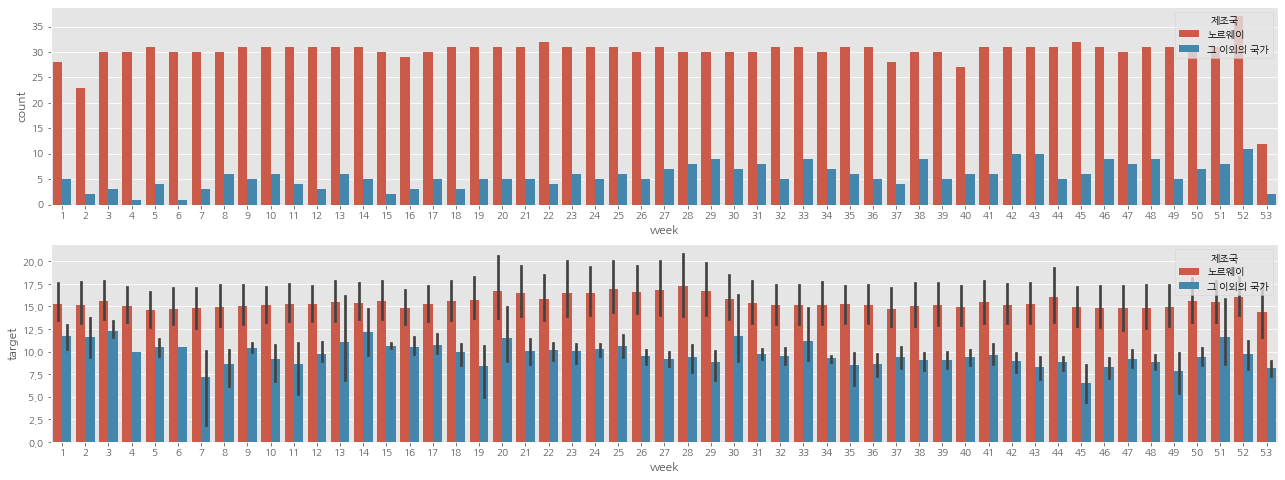

In [245]:
# 제조국
fig, ax = plt.subplots(nrows = 2, figsize = (22,8))
sns.countplot(data = df, x = 'week', hue = '제조국', ax = ax[0])
sns.barplot(data =df, x = 'week', y = 'target', hue = '제조국', ax = ax[1])

In [246]:
제조국_df = pd.get_dummies(df, columns = ['제조국'], drop_first = True)[['기준일','제조국_노르웨이','week']]
제조국_df = 제조국_df.groupby('week').mean().reset_index()

제조국_train = pd.get_dummies(train, columns = ['제조국'], drop_first = True)[['기준일','제조국_노르웨이','week']]
제조국_train = 제조국_train.groupby('week').mean().reset_index()

# 내일 이 부분을 좀 더 봐보자.
# 그리고 판매용과 자사제품 제조용 외화획득용 원료를 살펴보도록 하자.

In [247]:
# 더미화를 진행해 준 이후에 평균/std를 해주었다.
수입형태_df = pd.get_dummies(data = df, columns = ['수입형태'])[['기준일','수입형태_냉장', '수입형태_냉장,포장횟감,필렛(F)','수입형태_냉장,필렛(F)', '수입형태_냉장,필렛(F),횟감','수입형태_냉동','week']]
수입형태_df_mean = 수입형태_df.groupby('week').mean().reset_index()[['수입형태_냉장', '수입형태_냉장,포장횟감,필렛(F)','수입형태_냉장,필렛(F)', '수입형태_냉장,필렛(F),횟감','수입형태_냉동','week']]
수입형태_df_std = 수입형태_df.groupby('week').std().reset_index()[['수입형태_냉장', '수입형태_냉장,포장횟감,필렛(F)','수입형태_냉장,필렛(F)', '수입형태_냉장,필렛(F),횟감','수입형태_냉동','week']]

# train 데이터
수입형태_train = pd.get_dummies(data = train, columns = ['수입형태'])[['기준일','수입형태_냉장', '수입형태_냉장,포장횟감,필렛(F)','수입형태_냉장,필렛(F)', '수입형태_냉장,필렛(F),횟감','수입형태_냉동','week']]
수입형태_train_mean = 수입형태_train.groupby('week').mean().reset_index()[['수입형태_냉장', '수입형태_냉장,포장횟감,필렛(F)','수입형태_냉장,필렛(F)', '수입형태_냉장,필렛(F),횟감','수입형태_냉동','week']]
수입형태_train_std = 수입형태_train.groupby('week').std().reset_index()[['수입형태_냉장', '수입형태_냉장,포장횟감,필렛(F)','수입형태_냉장,필렛(F)', '수입형태_냉장,필렛(F),횟감','수입형태_냉동','week']]

In [248]:
# 수입형태의 빈도수를 계산한다.
수입형태_mean = df.groupby('week').mean()[['냉장', '필렛(F)', '횟감', '포장횟감', '냉동']].reset_index()
수입형태_std = df.groupby('week').std()[['냉장', '필렛(F)', '횟감', '포장횟감', '냉동']].reset_index()

수입형태_변형 = 수입형태_mean[['냉장', '필렛(F)', '횟감', '포장횟감', '냉동']]/(수입형태_std[['냉장', '필렛(F)', '횟감', '포장횟감', '냉동']]+1)
수입형태_변형['week'] = 수입형태_mean['week']
수입형태_변형

# train 데이터 해주기
수입형태_train_mean = train.groupby('week').mean()[['냉장', '필렛(F)', '횟감', '포장횟감', '냉동']].reset_index()
수입형태_train_std = train.groupby('week').std()[['냉장', '필렛(F)', '횟감', '포장횟감', '냉동']].reset_index()

수입형태_train_변형 = 수입형태_train_mean[['냉장', '필렛(F)', '횟감', '포장횟감', '냉동']]/(수입형태_train_std[['냉장', '필렛(F)', '횟감', '포장횟감', '냉동']]+1)
수입형태_train_변형['week'] = 수입형태_train_mean['week']
수입형태_train_변형

,냉장,필렛(F),횟감,포장횟감,냉동,week
0,1.000000,0.362272,0.091039,0.091039,0.000000,1
1,1.000000,0.422293,0.114863,0.114863,0.000000,2
2,1.000000,0.429560,0.116434,0.116434,0.000000,3
3,1.000000,0.460675,0.142020,0.116434,0.000000,4
4,1.000000,0.421975,0.132669,0.108771,0.000000,5
5,1.000000,0.449981,0.120712,0.120712,0.000000,6
6,0.803884,0.411315,0.112465,0.112465,0.032155,7
7,0.814305,0.366321,0.102101,0.102101,0.029082,8
8,1.000000,0.390484,0.124538,0.102101,0.000000,9
9,0.820395,0.364164,0.117398,0.096237,0.027346,10


In [249]:
# 외화획득용 제품이라 되어있는 부분을 외화획득용 원료로 바꿔준다.
df['수입용도'] = df['수입용도'].apply(lambda x:'외화획득용 원료' if x == '외화획득용 제품' else x)

# 수입용도로 데이터를 살펴보기로 하자.
수입용도_df = pd.get_dummies(data = df, columns = ['수입용도']).reset_index()[['기준일','week','수입용도_판매용','수입용도_자사제품제조용','수입용도_외화획득용 원료']]
수입용도_df = 수입용도_df.groupby('week').mean().reset_index()
수입용도_df

############ train #########################
# 외화획득용 제품이라 되어있는 부분을 외화획득용 원료로 바꿔준다.
train['수입용도'] = train['수입용도'].apply(lambda x:'외화획득용 원료' if x == '외화획득용 제품' else x)

# 수입용도로 데이터를 살펴보기로 하자.
수입용도_train = pd.get_dummies(data = train, columns = ['수입용도']).reset_index()[['기준일','week','수입용도_판매용','수입용도_자사제품제조용','수입용도_외화획득용 원료']]
수입용도_train = 수입용도_train.groupby('week').mean().reset_index()
수입용도_train

,week,수입용도_판매용,수입용도_자사제품제조용,수입용도_외화획득용 원료
0,1,0.696970,0.303030,0.000000
1,2,0.631579,0.368421,0.000000
2,3,0.680000,0.320000,0.000000
3,4,0.680000,0.320000,0.000000
4,5,0.666667,0.333333,0.000000
5,6,0.666667,0.333333,0.000000
6,7,0.653846,0.307692,0.038462
7,8,0.689655,0.275862,0.034483
8,9,0.689655,0.310345,0.000000
9,10,0.677419,0.290323,0.032258


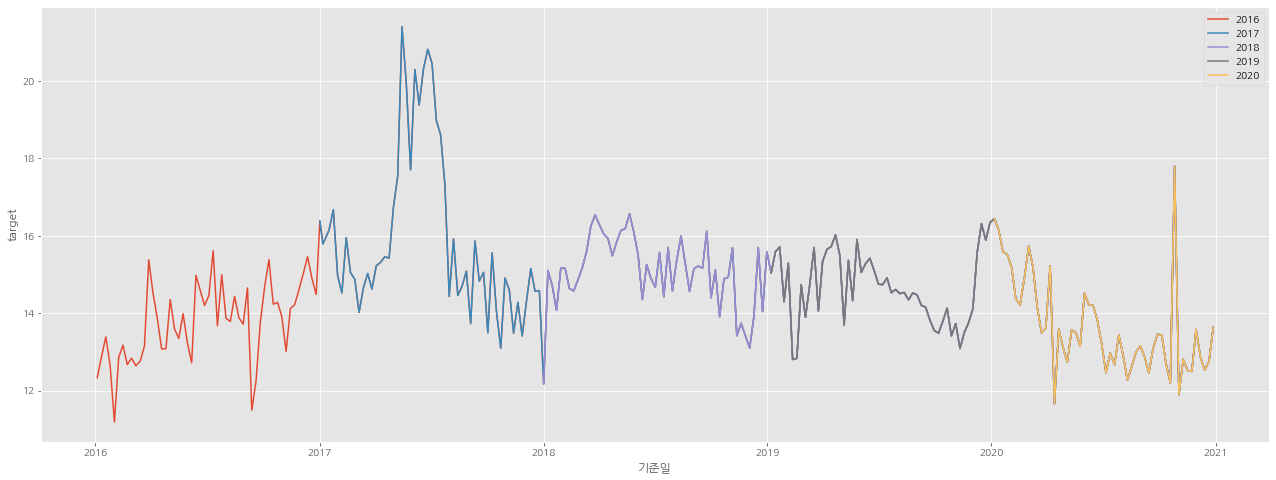

In [250]:
# 연별로 차이가 있는지 확인하는게 먼저인가?
year = ['2016','2017','2018','2019','2020']
plot_data = df.groupby('기준일')['target'].mean().reset_index()

year_dict = {}
for i in range(len(year)):
  if i == '2016':
    year_dict[year[i]] = plot_data[plot_data['기준일'] < year[i+1]]

  elif i in ['2017','2018','2019']:

    year_dict[year[i]] = plot_data[(plot_data['기준일'] >= year[i]) & (plot_data['기준일'] < year[i+1])]

  else:
    year_dict[year[i]] = plot_data[plot_data['기준일'] >= year[i]]

plt.figure(figsize= (22,8))
for idx, value in year_dict.items():
  sns.lineplot(data = value, x = '기준일', y = 'target')

plt.legend(labels = [i for i in year_dict.keys()])
plt.show()

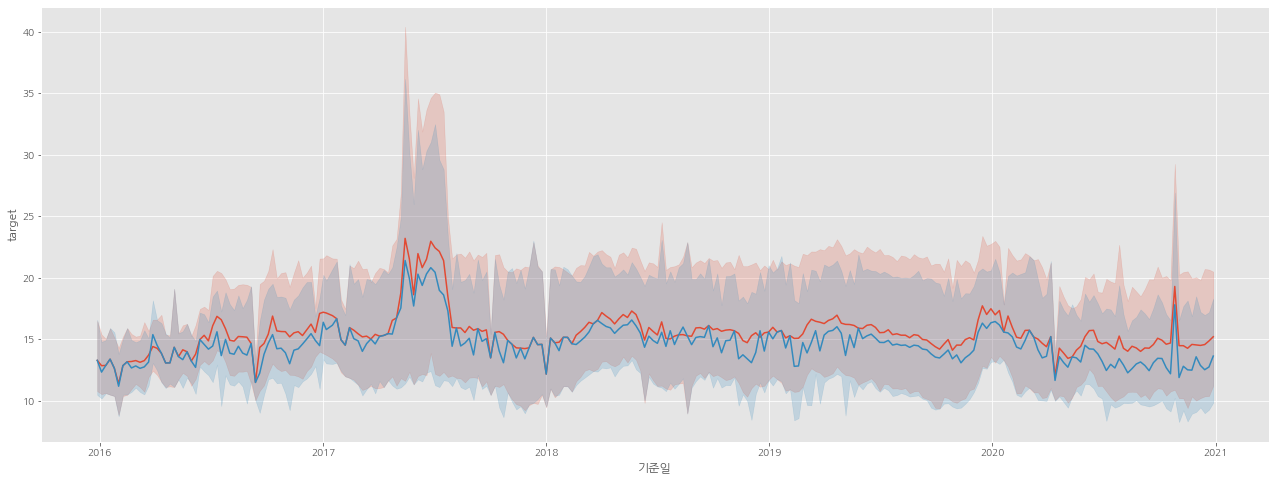

In [251]:
# 나라별로 데이터를 살펴보기로 하자.
plt.figure(figsize = (22,8))
sns.lineplot(data = df[df['제조국'] == '노르웨이'], x = '기준일', y = 'target')
sns.lineplot(data = df, x = '기준일', y = 'target')
plt.show()

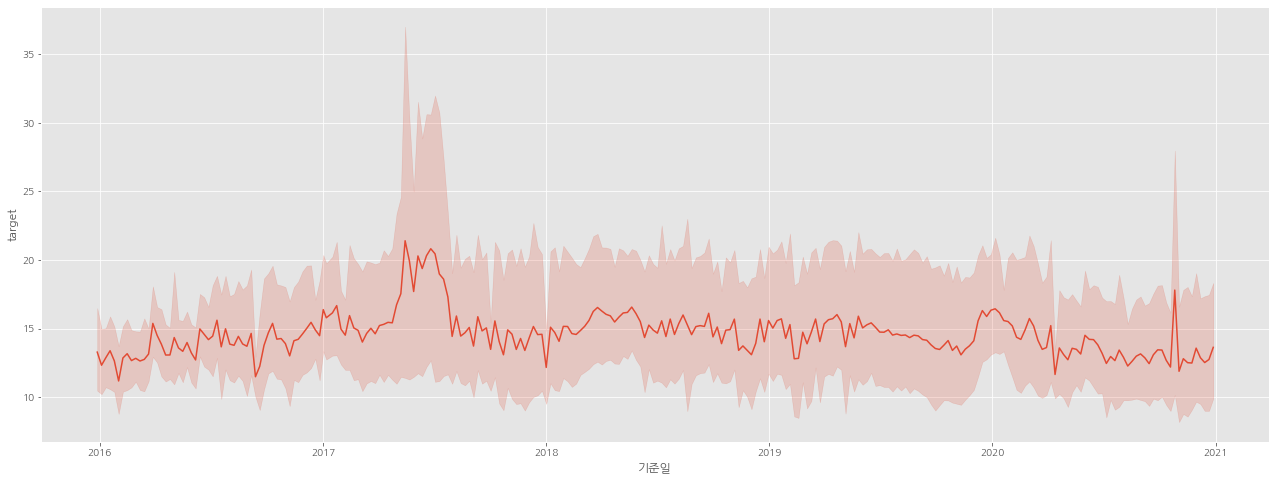

In [252]:
# 영국도 관련이 없다고 생각된다.
plt.figure(figsize = (22,8))
sns.lineplot(data = df[df['제조국'] == '영국'], x = '기준일', y = 'target')
sns.lineplot(data = df, x = '기준일', y = 'target')
plt.show()

## 환율

In [253]:
def load_currency(PATH, country = None):
    
    # 경로를 입력해주면 해당 경로에 저장된 환율 데이터 불러오기
    currency_data = pd.read_csv(PATH)

    # Date 변수가 문자형 타입으로 저장되어 있기 때문에, 날짜형으로 변환
    currency_data['Date'] = pd.to_datetime(currency_data['Date'])

    # 날짜를 기준으로 하여 오름차순으로 정렬해주도록 한다.
    currency_data = currency_data.sort_values(by = 'Date', ignore_index = True)

    # 한 주마다 환율의 평균을 구해줘야 하기 때문에 '기준일'을 나타내는 변수를 생성해주도록 한다.
    currency_data['기준일'] = np.repeat(pd.date_range(start = '2015-12-28', end = '2021-07-04', freq = '7D'), 7)

    # 기준일 변수를 기준으로 하여 한 주의 평균 환율을 구해주도록 한다.
    return_data = pd.pivot_table(currency_data, index = '기준일', values = country).reset_index()

    return return_data

In [254]:
환율데이터 = load_currency('/content/drive/MyDrive/빅콘테스트/환율데이터.csv',country = ['노르웨이','대한민국'])
환율데이터

,기준일,노르웨이,대한민국
0,2015-12-28,8.797391,1182.143143
1,2016-01-04,8.888908,1202.685571
2,2016-01-11,8.844832,1217.597714
3,2016-01-18,8.794476,1202.050571
4,2016-01-25,8.682488,1211.344429
...,...,...,...
283,2021-05-31,8.317809,1109.764286
284,2021-06-07,8.298362,1114.390000
285,2021-06-14,8.522072,1128.655714
286,2021-06-21,8.520960,1129.180000


Text(0.5, 0, '')

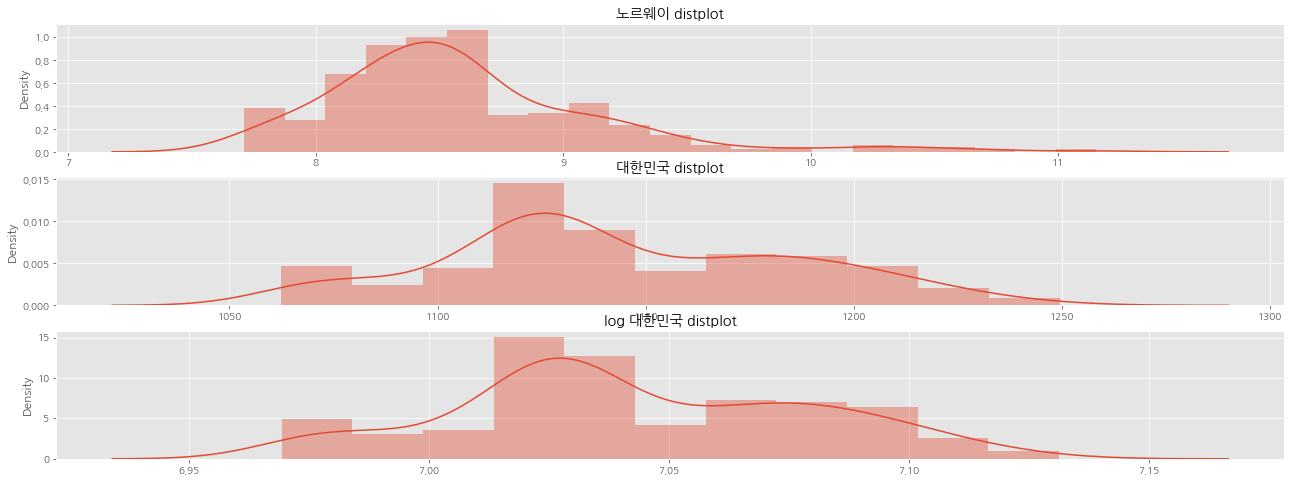

In [255]:
# 환율데이터가 얼마나 데이터와 맞게 따라가는지 확인해 보자
fig, ax = plt.subplots(nrows = 3, figsize = (22,8))
sns.distplot(환율데이터['노르웨이'], ax = ax[0])
sns.distplot(환율데이터['대한민국'], ax = ax[1])
sns.distplot(환율데이터['대한민국'].apply(lambda x: np.log1p(x)), ax = ax[2])

ax[0].set_title('노르웨이 distplot')
ax[1].set_title('대한민국 distplot')
ax[2].set_title('log 대한민국 distplot')

ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('')

## 유가 주식 데이터

In [256]:
!pip install yfinance

In [307]:
import yfinance as yf

# oil 데이터를 받아준다.
oil_df = yf.download('WTI',start = '2015-12-25', end = '2021-07-04')
oil_df = oil_df.reset_index()

# oil_df를 시간별 데이터로 나눠준다.
oil_df['week'] = oil_df['Date'].dt.week
oil_df['month'] = oil_df['Date'].dt.month
oil_df['year'] = oil_df['Date'].dt.year
oil_df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,week,month,year
0,2015-12-28,2.57,2.57,2.35,2.37,2.37,785900,53,12,2015
1,2015-12-29,2.49,2.52,2.35,2.36,2.36,1227500,53,12,2015
2,2015-12-30,2.23,2.30,2.15,2.22,2.22,982900,53,12,2015
3,2015-12-31,2.23,2.36,2.15,2.31,2.31,1401300,53,12,2015
4,2016-01-04,2.44,2.56,2.27,2.37,2.37,1947800,1,1,2016
...,...,...,...,...,...,...,...,...,...,...
1384,2021-06-28,4.95,4.97,4.61,4.72,4.72,3481000,26,6,2021
1385,2021-06-29,4.71,4.84,4.71,4.71,4.71,2004200,26,6,2021
1386,2021-06-30,4.75,4.86,4.72,4.85,4.85,1899300,26,6,2021
1387,2021-07-01,4.98,5.14,4.95,5.07,5.07,4816900,26,7,2021


In [308]:
df[(df['기준일'] >= '2019') & (df['기준일'] < '2020')]

,기준일,제조국,수출국,수입용도,수입형태,target,year,month,week,day,냉동,냉장,횟감,포장횟감,필렛(F)
1117,2019-01-07,그 이외의 국가,호주,자사제품제조용,냉장,9.418883,2019,1,2,7,0,1,0,0,0
1118,2019-01-07,노르웨이,노르웨이,판매용,"냉장,포장횟감,필렛(F)",29.312178,2019,1,2,7,0,1,0,1,1
1119,2019-01-07,노르웨이,노르웨이,판매용,"냉장,필렛(F),횟감",15.839713,2019,1,2,7,0,1,1,0,1
1120,2019-01-07,노르웨이,노르웨이,자사제품제조용,냉장,10.516218,2019,1,2,7,0,1,0,0,0
1121,2019-01-07,노르웨이,노르웨이,판매용,"냉장,필렛(F)",14.499471,2019,1,2,7,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,2019-12-30,노르웨이,노르웨이,판매용,"냉장,필렛(F)",16.495971,2019,12,1,30,0,1,0,0,1
1485,2019-12-30,노르웨이,노르웨이,판매용,"냉장,필렛(F),횟감",18.350634,2019,12,1,30,0,1,1,0,1
1486,2019-12-30,노르웨이,노르웨이,자사제품제조용,냉장,11.128269,2019,12,1,30,0,1,0,0,0
1487,2019-12-30,노르웨이,노르웨이,자사제품제조용,"냉장,필렛(F)",15.631531,2019,12,1,30,0,1,0,0,1


In [312]:
from datetime import timedelta

start = '2015-12-28'

time_list = []
start = pd.to_datetime(start)
for i in range(2016):
  start = pd.to_datetime(start)
  start = start.strftime('%Y-%m-%d')
  time_list.append(start)

  start = pd.to_datetime(start)
  start = start + timedelta(days = 1) 

In [313]:
final_oil

,Date,Open,High,Low,Close,Adj Close,Volume,week,month,year
0,2015-12-28,2.57,2.57,2.35,2.37,2.37,785900.0,53.0,12.0,2015.0
1,2015-12-29,2.49,2.52,2.35,2.36,2.36,1227500.0,53.0,12.0,2015.0
2,2015-12-30,2.23,2.30,2.15,2.22,2.22,982900.0,53.0,12.0,2015.0
3,2015-12-31,2.23,2.36,2.15,2.31,2.31,1401300.0,53.0,12.0,2015.0
4,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2010,2021-06-29,4.71,4.84,4.71,4.71,4.71,2004200.0,26.0,6.0,2021.0
2011,2021-06-30,4.75,4.86,4.72,4.85,4.85,1899300.0,26.0,6.0,2021.0
2012,2021-07-01,4.98,5.14,4.95,5.07,5.07,4816900.0,26.0,7.0,2021.0
2013,2021-07-02,5.04,5.05,4.87,4.89,4.89,2433800.0,26.0,7.0,2021.0


## 내일은 이 부분 마무리 하고 모델링 다시 학습할 것

In [321]:
final_oil = pd.DataFrame(time_list, columns = ['Date'])
final_oil['Date'] = pd.to_datetime(final_oil['Date'])
final_oil = pd.merge(final_oil, oil_df, how  = 'left', on = 'Date')

final_oil['기준일'] = np.repeat(pd.date_range(start = '2015-12-28', end = '2021-07-03', freq = '7D'), 7)

pd.pivot_table(final_oil, index = '기준일', aggfunc = 'mean')

,Adj Close,Close,High,Low,Open,Volume,month,week,year
기준일,,,,,,,,,
2015-12-28,2.315,2.315,2.4375,2.2500,2.3800,1099400.0,12.0,53.0,2015.0
2016-01-04,2.112,2.112,2.2320,2.0660,2.1860,1733200.0,1.0,1.0,2016.0
2016-01-11,1.626,1.626,1.7520,1.5780,1.6940,1810520.0,1.0,2.0,2016.0
2016-01-18,1.510,1.510,1.6125,1.4250,1.5425,1633750.0,1.0,3.0,2016.0
2016-01-25,1.752,1.752,1.8200,1.6600,1.7460,1083580.0,1.0,4.0,2016.0
...,...,...,...,...,...,...,...,...,...
2021-05-31,4.335,4.335,4.4100,4.1125,4.1725,4152050.0,6.0,22.0,2021.0
2021-06-07,4.542,4.542,4.6220,4.4640,4.5640,2002420.0,6.0,23.0,2021.0
2021-06-14,4.578,4.578,4.7120,4.4840,4.6160,2482960.0,6.0,24.0,2021.0


2016

In [315]:
for i in df.year.unique():
  print(f'{i} 연도',df[df['year'] == i]['week'].unique())

print('******************************************************************')

for j in oil_df.year.unique():
  print(f'{j} 연도', oil_df[oil_df['year'] == j]['week'].unique())

2015 연도 [53]
2016 연도 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52]
2017 연도 [52  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51]
2018 연도 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52]
2019 연도 [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52  1]
2020 연도 [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53]
******************************************************************
2015 연도 [53]
2016 연도 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 2

In [ ]:
len(df['기준일'].unique())

# Modeling data

## train VS val

In [ ]:
# 환율데이터 train_val에만 사용할 데이터를 가져온다.
train_val_환율 = 환율데이터[환율데이터['기준일'] < '2021'].reset_index()

train_환율 = 환율데이터[(환율데이터['기준일'] >= '2015-12-28') & (환율데이터['기준일'] < '2020')]
val_환율 = 환율데이터[(환율데이터['기준일'] >= '2020') & (환율데이터['기준일'] < '2021')].reset_index(drop = True)

In [ ]:
train_data = train.groupby('기준일').mean().reset_index()[['기준일','target','month','week']]
train_data = pd.concat([train_data, train_환율[['대한민국','노르웨이']]], axis = 1)

train_data = pd.merge(train_data, 수입형태_train_mean, how = 'left', on = 'week')
train_data = pd.merge(train_data, 제조국_train, how = 'left', on = 'week')
train_data = pd.merge(train_data, 수입용도_train, how = 'left', on = 'week')
train_data.drop(['month','week'], axis = 1, inplace = True)

train_data['대한민국'] = train_data['대한민국'].apply(lambda x:np.log1p(x))

val_data = val.groupby('기준일').mean().reset_index()[['기준일','target','month','week']]
val_data = pd.concat([val_data, val_환율[['대한민국','노르웨이']]], axis = 1)

val_data = pd.merge(val_data, 수입형태_train_mean, how = 'left', on = 'week')
val_data = pd.merge(val_data, 제조국_train, how = 'left', on = 'week')
val_data = pd.merge(val_data, 수입용도_train, how = 'left', on = 'week')
val_data.drop(['month','week'], axis = 1, inplace = True)

val_data['대한민국'] = val_data['대한민국'].apply(lambda x:np.log1p(x))

In [ ]:
# # 데이터를 groupby를 사용하여 기준일 별 데이터를 가져온다.
# data = df.groupby('기준일').mean().reset_index()[['기준일','target','month','week']]
# data = pd.concat([data, train_val_환율[['대한민국','노르웨이']]], axis = 1)

# data = pd.merge(data, 수입형태_df_mean ,how ='left', on = 'week') 
# # data = pd.merge(data, 수입형태_df_std, how = 'left', on = 'month')
# # data = pd.merge(data, std_노르웨이, how = 'left', on = 'month')
# data = pd.merge(data, 수입형태_변형, how = 'left', on = 'week')
# data = pd.merge(data, mean_노르웨이, how = 'left', on = 'week')
# data = pd.merge(data, 수입용도_df, how = 'left', on = 'week')
# data.drop(['month','week'], axis = 1, inplace = True)
# # data = pd.get_dummies(data, columns = ['month'])

# data['대한민국'] = data['대한민국'].apply(lambda x: np.log1p(x))

In [ ]:
!pip install catboost

In [ ]:
!pip install vecstack

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from vecstack import stacking

def run_model(train_data = None, val_data = None):

  train_data = train_data.reset_index(drop = True)
  val_data = val_data.reset_index(drop = True)

  X_train, y_train = train_data.drop(['기준일','target'], axis = 1), train_data['target']
  X_test, y_test = val_data.drop(['기준일','target'], axis = 1), val_data['target']

  models = {'lightgbm':LGBMRegressor(random_state = 42), 'xgboost':XGBRegressor(random_state = 42),'catboost': CatBoostRegressor(random_state = 42, verbose = False),'lr': LinearRegression(),
            'ridge': Ridge(random_state = 42),'lasso': Lasso(),'rfg':RandomForestRegressor(random_state = 42),'gb':GradientBoostingRegressor(random_state = 42)}


  final_y_pred = {}
  for i, j in models.items():
    model = j
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_pred = pd.Series(y_pred)

    validation_data = pd.concat([val_data[['기준일','target']],y_pred], axis = 1).rename(columns = {0 : 'y_pred'}).groupby('기준일').mean()

    final_y_pred[i] = validation_data

  for i, j in final_y_pred.items():
    print(f'***************************{i}의 그래프**************************')

    plt.figure(figsize = (16,8))
    sns.lineplot(data =j , x = '기준일', y = 'target')
    sns.lineplot(data =j, x = '기준일', y = 'y_pred')
    plt.legend(labels = ['target','y_pred'])
    plt.show()

    print(f'{i}의 RMSE :', mean_squared_error(j['target'], j['y_pred']) ** 0.5)
    print(f'{i}의 r^2 score :', r2_score(j['target'], j['y_pred']))

run_model(train_data = train_data, val_data = val_data)

In [ ]:
# Stacking Ensemble
def rmse(y, y_pred):

  return np.sqrt(mean_squared_error(y, y_pred))

lgb = LGBMRegressor(random_state =42)
xgb = XGBRegressor(random_state = 42, tree_method = 'gpu_hist')
catboost = CatBoostRegressor(random_state =42, task_type = 'GPU', verbose = False)
rfg = RandomForestRegressor(random_state = 42)
ridge = Ridge(random_state = 42)
lr = LinearRegression()
gb = GradientBoostingRegressor(random_state = 42)
lasso = Lasso(random_state = 42)

X_train, y_train = train_data.drop(['기준일','target'], axis = 1), train_data['target']
X_test, y_test = val_data.drop(['기준일','target'], axis = 1), val_data['target']

models = [lgb,xgb, catboost, ridge, rfg,lr, gb, lasso]

S_train, S_test = stacking(models, X_train, y_train, X_test, regression = True, mode = 'oof_pred_bag', metric  = rmse, n_folds =3, random_state = 42)

lgb = LGBMRegressor(random_state = 42)
lgb.fit(S_train, y_train)
y_pred = lgb.predict(S_test)
RMSE = mean_squared_error(y_test, y_pred) **0.5

print('R^2 score :',r2_score(y_test, y_pred))
print('rmse score :',RMSE)

In [ ]:
# Voting Ensemble
from sklearn.ensemble import VotingRegressor

lr = LinearRegression()
lgb = LGBMRegressor(random_state = 42)
cat = CatBoostRegressor(random_state = 42,verbose = False, task_type = 'GPU')
xgb = XGBRegressor(random_state = 42,tree_method = 'gpu_hist')
ridge = Ridge(random_state = 42)
rfg = RandomForestRegressor(random_state = 42)
gb = GradientBoostingRegressor(random_state = 42)


vo_reg = VotingRegressor(estimators = [('lr',lr),('lgb',lgb),('cat',cat),('xgb',xgb),('ridge',ridge),('rfg',rfg),('gb',gb)], n_jobs = 3)
vo_reg.fit(X_train, y_train)
y_pred = vo_reg.predict(X_test)

RMSE = rmse(y_test, y_pred)

print('R^2 score :',r2_score(y_test, y_pred))
print('rmse score :',RMSE)

In [ ]:
# statsmodel을 사용하여 통계적 지표로 확인해 보자.
import statsmodels.api as sm

X = sm.add_constant(data.drop(['기준일','target'], axis = 1))
y = data['target']

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

# LSTM (모델을 어떻게 구축하는지 모르겠다)

In [ ]:
# data.columns

In [ ]:
# TEST_SIZE = len(data[(data['기준일'] >= '2020') & (data['기준일'] < '2020-07')])

# train = data[:TEST_SIZE]
# val = data[-TEST_SIZE:]

# def make_dataset(data, label, window_size = 20):
#   feature_list = []
#   label_list = []

#   for i in range(len(data) - window_size):
#     feature_list.append(np.array(data.iloc[i : i+window_size]))
#     label_list.append(np.array(label.iloc[i+window_size]))

#   return np.array(feature_list), np.array(label_list)

# from sklearn.model_selection import train_test_split

# feature_cols = ['대한민국', '노르웨이', '수입형태_냉장', '수입형태_냉장,포장횟감,필렛(F)',
#        '수입형태_냉장,필렛(F)', '수입형태_냉장,필렛(F),횟감', '수입형태_냉동', '제조국_노르웨이_x',
#        '제조국_노르웨이_y', 'month_1.0', 'month_2.0', 'month_3.0', 'month_4.0',
#        'month_5.0', 'month_6.0', 'month_7.0', 'month_8.0', 'month_9.0',
#        'month_10.0', 'month_11.0', 'month_12.0']

# label_cols = ['target']

# train_feature = train[feature_cols]
# train_label = train[label_cols]

# train_feature, train_label = make_dataset(train_feature, train_label, 20)

# val_feature = val[feature_cols]
# val_label = val[label_cols]

# val_feature, val_label = make_dataset(val_feature, val_label, 20)

# from keras.models import Sequential
# from keras.layers import Dense
# from keras.callbacks import EarlyStopping, ModelCheckpoint
# from keras.layers import LSTM

# model = Sequential()
# model.add(LSTM(16,
#                input_shape = (train_feature.shape[1], train_feature.shape[2]),
#                activation = 'relu',
#                return_sequences = False))
# model.add(Dense(1))

# model.compile(loss = 'mean_squared_error', optimizer = 'adam')

# history = model.fit(train_feature, train_label, epochs = 200, batch_size = 1, validation_data = (val_feature, val_label))

# pred = model.predict(val_feature)
# pred.shape

In [ ]:
# plt.figure(figsize=(12, 9))
# plt.plot(val_label, label = 'actual')
# plt.plot(pred, label = 'prediction')
# plt.legend()
# plt.show()